In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv')

In [4]:
# Read the first 5 rows of the dataset
print(df.head())

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [5]:
# Copy the original dataset
df_biased = df.copy()

In [6]:
# Indduce the biasing in the fastingbloodsugar 
highbloodsugar = df_biased[df_biased['fastingbloodsugar'] == 1]
df_biased = pd.concat([df_biased, highbloodsugar.sample(frac=0.5, replace=True, random_state = 42)])

In [10]:
print("for biased dataset")
print("\n")
print(df_biased['fastingbloodsugar'].value_counts())
print("for original dataset")
print("\n")
print(df["fastingbloodsugar"].value_counts())

for biased dataset


fastingbloodsugar
0    704
1    444
Name: count, dtype: int64
for original dataset


fastingbloodsugar
0    704
1    296
Name: count, dtype: int64


In [9]:
print(df["fastingbloodsugar"].value_counts())

fastingbloodsugar
0    704
1    296
Name: count, dtype: int64


In [6]:
# Inducing the biasing in 'maxheartrate' by increasing the values of a subset of data
# add a constant value to maxheartrate for patients with heart disease
df_biased.loc[df_biased['target'] == 1, 'maxheartrate'] += np.random.normal(15, 5, size=len(df_biased[df_biased['target'] == 1]))

C:\Users\mridu\AppData\Local\Temp\ipykernel_4020\4004035579.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[166.67393219 174.13049295 153.5261004  172.18991265 167.05297996
 174.75601807 165.79112595 151.44665032 151.3086595  126.78932507
 182.47452273 151.75990254 140.62542505 197.92400117 191.57656263
 215.76983299 131.10270939 147.65061349 209.24044107 169.45893196
 158.52436151 143.96450018 207.23089749 188.83884754 202.0987683
 195.00827115 156.69424003 192.72696083 123.92465449 151.97471494
 103.19049147 196.38694638 161.81667745 142.33398587 116.85229253
 167.63933951 180.44299037 217.54315855 185.64177931 187.08191328
 193.32188327 196.73243666 136.64216193 183.9880683  135.07297955
 211.51884011 131.34706972 212.90995183 169.15983728 206.00371095
 129.26157926 182.28684599 196.21552016 118.71505638 196.77347216
 180.62788715 210.99791389 119.7630387  201.26007922 158.02606395
 177.76451353 

In [7]:
# 3. Inducing bias in 'oldpeak' by increasing values, simulating more severe cases
# Increase 'oldpeak' values for patients with specific conditions (e.g., gender = 1 and chestpain type 2)
df_biased.loc[(df_biased['gender'] == 1) & (df_biased['chestpain'] == 2), 'oldpeak'] += np.random.normal(1.5, 0.5, size=len(df_biased[(df_biased['gender'] == 1) & (df_biased['chestpain'] == 2)]))

In [8]:
# Ensure oldpeak does not exceed the realistic maximum
df_biased['oldpeak'] = np.clip(df_biased['oldpeak'], 0, 6.2)

In [9]:
# Save the biased dataset
df_biased.to_csv('biased_cardiovascular_dataset.csv', index=False)

In [10]:
# Load both datasets for comparison
original_df = pd.read_csv('Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv')
biased_df = pd.read_csv('biased_cardiovascular_dataset.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Function to plot comparison of original and biased datasets
def plot_comparison(column_name, original_df, biased_df):
    plt.figure(figsize=(12, 6))
    sns.histplot(original_df[column_name], kde=True, color='blue', label='Original', stat="density", common_norm=False)
    sns.histplot(biased_df[column_name], kde=True, color='red', label='Biased', stat="density", common_norm=False)
    plt.title(f'Comparison of {column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


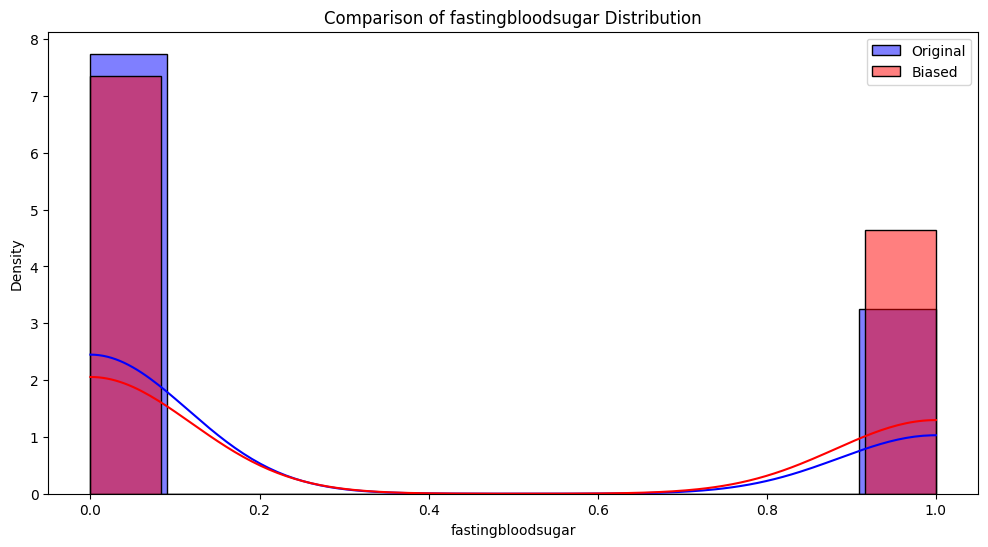

c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


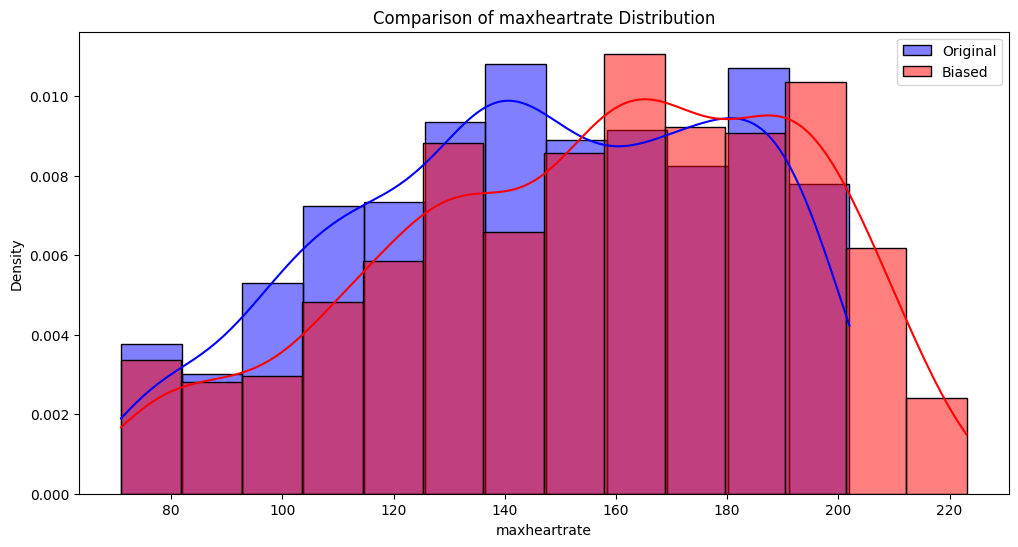

c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mridu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


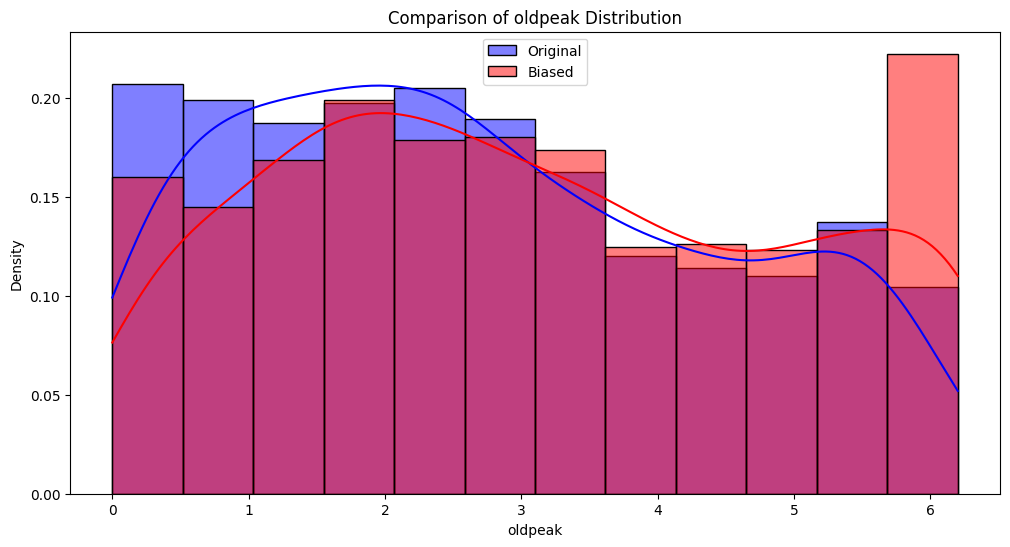

In [12]:
# Compare the columns
plot_comparison('fastingbloodsugar', original_df, biased_df)
plot_comparison('maxheartrate', original_df, biased_df)
plot_comparison('oldpeak', original_df, biased_df)

In [13]:
# Function to print statistical comparison
def compare_statistics(column_name, original_df, biased_df):
    print(f"--- {column_name} Statistics Comparison ---")
    print(f"Original Mean: {original_df[column_name].mean():.2f}")
    print(f"Biased Mean: {biased_df[column_name].mean():.2f}")
    print(f"Original Median: {original_df[column_name].median():.2f}")
    print(f"Biased Median: {biased_df[column_name].median():.2f}")
    print(f"Original Std Dev: {original_df[column_name].std():.2f}")
    print(f"Biased Std Dev: {biased_df[column_name].std():.2f}\n")

In [14]:
# Compare statistics for the columns
compare_statistics('fastingbloodsugar', original_df, biased_df)
compare_statistics('maxheartrate', original_df, biased_df)
compare_statistics('oldpeak', original_df, biased_df)

--- fastingbloodsugar Statistics Comparison ---
Original Mean: 0.30
Biased Mean: 0.39
Original Median: 0.00
Biased Median: 0.00
Original Std Dev: 0.46
Biased Std Dev: 0.49

--- maxheartrate Statistics Comparison ---
Original Mean: 145.48
Biased Mean: 155.49
Original Median: 146.00
Biased Median: 159.79
Original Std Dev: 34.19
Biased Std Dev: 36.53

--- oldpeak Statistics Comparison ---
Original Mean: 2.71
Biased Mean: 3.08
Original Median: 2.40
Biased Median: 2.90
Original Std Dev: 1.72
Biased Std Dev: 1.84



In [15]:
# # Mapping for fastingbloodsugar
# def map_fastingbloodsugar_changes(original_df, biased_df):
#     original_counts = original_df['fastingbloodsugar'].value_counts()
#     biased_counts = biased_df['fastingbloodsugar'].value_counts()
#     print("Fasting Blood Sugar Mapping:")
#     print("Original Counts:")
#     print(original_counts)
#     print("\nBiased Counts:")
#     print(biased_counts)
#     print("\nChange in Counts:")
#     print(biased_counts - original_counts)
#     print("\n")

# # Mapping for maxheartrate
# def map_maxheartrate_changes(original_df, biased_df):
#     original_mean = original_df['maxheartrate'].mean()
#     biased_mean = biased_df['maxheartrate'].mean()
#     original_std = original_df['maxheartrate'].std()
#     biased_std = biased_df['maxheartrate'].std()
#     print("Max Heart Rate Mapping:")
#     print(f"Original Mean: {original_mean:.2f}, Biased Mean: {biased_mean:.2f}")
#     print(f"Original Std Dev: {original_std:.2f}, Biased Std Dev: {biased_std:.2f}")
#     print(f"Change in Mean: {biased_mean - original_mean:.2f}")
#     print(f"Change in Std Dev: {biased_std - original_std:.2f}\n")

# # Mapping for oldpeak
# def map_oldpeak_changes(original_df, biased_df):
#     original_mean = original_df['oldpeak'].mean()
#     biased_mean = biased_df['oldpeak'].mean()
#     original_std = original_df['oldpeak'].std()
#     biased_std = biased_df['oldpeak'].std()
#     changes = biased_df['oldpeak'] - original_df['oldpeak']
#     count_increased = np.sum(changes > 0)
#     count_decreased = np.sum(changes < 0)
#     print("Oldpeak Mapping:")
#     print(f"Original Mean: {original_mean:.2f}, Biased Mean: {biased_mean:.2f}")
#     print(f"Original Std Dev: {original_std:.2f}, Biased Std Dev: {biased_std:.2f}")
#     print(f"Change in Mean: {biased_mean - original_mean:.2f}")
#     print(f"Change in Std Dev: {biased_std - original_std:.2f}")
#     print(f"Count Increased: {count_increased}")
#     print(f"Count Decreased: {count_decreased}\n")

In [16]:
# # Call the functions to display mappings
# map_fastingbloodsugar_changes(original_df, biased_df)
# map_maxheartrate_changes(original_df, biased_df)
# map_oldpeak_changes(original_df, biased_df)

## Performing Machine Learning Analysis for the datasets

In [17]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
original_df = pd.read_csv('Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv')
biased_df = pd.read_csv('biased_cardiovascular_dataset.csv')

In [19]:
# Function to preprocess the data: handling missing values, encoding, scaling
def preprocess_data(df):
    # Drop any missing values if present
    df = df.dropna()
    
    # Define features and target
    X = df.drop(columns=['patientid', 'target'])  # Dropping 'patientid' and target column for features
    y = df['target']
    
    # Standardize the numeric columns
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

In [20]:
# Preprocess both datasets
X_original, y_original = preprocess_data(original_df)
X_biased, y_biased = preprocess_data(biased_df)

In [21]:
# Split data into training and testing sets
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42)
X_train_biased, _, y_train_biased, _ = train_test_split(X_biased, y_biased, test_size=0.3, random_state=42)

In [22]:
# Train Logistic Regression model on original dataset
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train_orig, y_train_orig)


LogisticRegression(random_state=42)

In [23]:
# Train Logistic Regression model on biased dataset
model_biased = LogisticRegression(random_state=42)
model_biased.fit(X_train_biased, y_train_biased)

LogisticRegression(random_state=42)

In [24]:
# Predict on the test set using both models
pred_original = model_original.predict(X_test)
pred_biased = model_biased.predict(X_test)

In [25]:
# Compare predictions
comparison = pd.DataFrame({
    'Actual': y_test,
    'Pred_Original': pred_original,
    'Pred_Biased': pred_biased
})

In [26]:
# Analyze differences
comparison['Difference'] = comparison['Pred_Original'] - comparison['Pred_Biased']

In [27]:
# Print metrics for original and biased models
print("Original Model Performance on Test Set:")
print(classification_report(y_test, pred_original))
print("Biased Model Performance on Test Set:")
print(classification_report(y_test, pred_biased))

Original Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       138
           1       0.97      0.96      0.97       162

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Biased Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       138
           1       0.98      0.98      0.98       162

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [28]:
# Mapping analysis - when predictions differ
diff = comparison[comparison['Difference'] != 0]
print("Number of differing predictions:", len(diff))

Number of differing predictions: 5


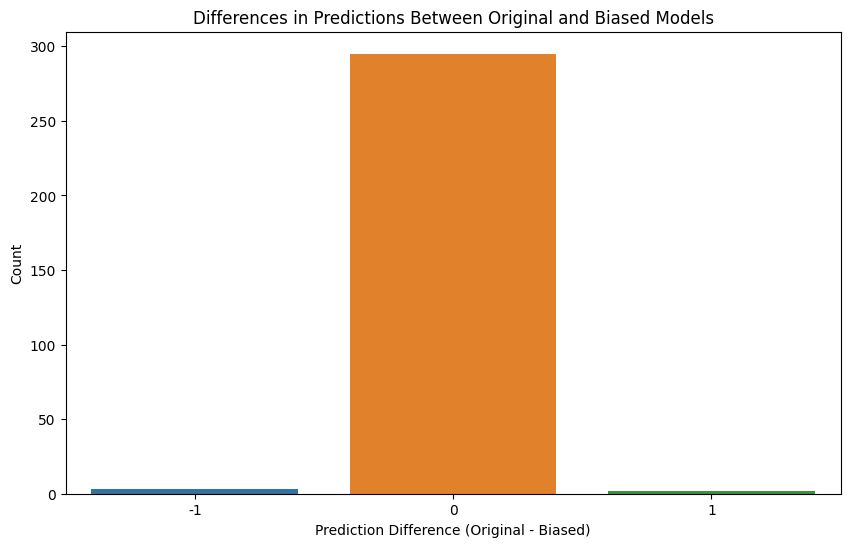

In [29]:
# Visualizing the difference in predictions
plt.figure(figsize=(10, 6))
sns.countplot(x='Difference', data=comparison)
plt.title('Differences in Predictions Between Original and Biased Models')
plt.xlabel('Prediction Difference (Original - Biased)')
plt.ylabel('Count')
plt.show()

In [30]:
# Mapping function to show how input values affect outputs
def map_input_to_output_changes(X, original_model, biased_model):
    mapped_results = []
    for i, x in enumerate(X):
        original_pred = original_model.predict([x])[0]
        biased_pred = biased_model.predict([x])[0]
        if original_pred != biased_pred:
            mapped_results.append((x, original_pred, biased_pred))
    return mapped_results

In [31]:
# Perform the mapping on the test set
mapping_results = map_input_to_output_changes(X_test, model_original, model_biased)
mapping_results[:5]

[(array([ 0.09845543, -1.8042503 ,  1.07066333, -0.62593818, -0.70591268,
         -0.64842466,  1.62652828,  0.7468725 ,  1.00400803, -1.10919714,
         -0.53828025,  0.79623726]),
  0,
  1),
 (array([-0.6295995 ,  0.55424682, -1.02867653,  1.24382969,  0.33656006,
         -0.64842466, -0.9717597 , -1.5941454 ,  1.00400803, -1.22548347,
         -0.53828025,  0.79623726]),
  1,
  0),
 (array([ 1.55456529,  0.55424682, -1.02867653,  1.47755067,  0.32145176,
         -0.64842466, -0.9717597 , -1.36004361,  1.00400803, -0.93476765,
         -0.53828025,  0.79623726]),
  1,
  0),
 (array([ 0.54648923,  0.55424682,  1.07066333, -1.59421083,  0.44987231,
         -0.64842466, -0.9717597 ,  1.39065242,  1.00400803, -0.87662448,
         -0.53828025,  0.79623726]),
  0,
  1),
 (array([-0.57359528,  0.55424682,  0.0209934 , -1.39387856, -0.41130082,
          1.5421992 ,  0.32738429,  0.92244884,  1.00400803, -0.06262019,
         -0.53828025, -1.25064516]),
  0,
  1)]

In [32]:
# Display some examples of mapping results
for i, (inputs, orig, biased) in enumerate(mapping_results[:5]):  # Showing first 5 mappings
    print(f"Test Case {i+1}:")
    print(f"Input Values: {inputs}")
    print(f"Original Prediction: {orig}, Biased Prediction: {biased}")
    print()

Test Case 1:
Input Values: [ 0.09845543 -1.8042503   1.07066333 -0.62593818 -0.70591268 -0.64842466
  1.62652828  0.7468725   1.00400803 -1.10919714 -0.53828025  0.79623726]
Original Prediction: 0, Biased Prediction: 1

Test Case 2:
Input Values: [-0.6295995   0.55424682 -1.02867653  1.24382969  0.33656006 -0.64842466
 -0.9717597  -1.5941454   1.00400803 -1.22548347 -0.53828025  0.79623726]
Original Prediction: 1, Biased Prediction: 0

Test Case 3:
Input Values: [ 1.55456529  0.55424682 -1.02867653  1.47755067  0.32145176 -0.64842466
 -0.9717597  -1.36004361  1.00400803 -0.93476765 -0.53828025  0.79623726]
Original Prediction: 1, Biased Prediction: 0

Test Case 4:
Input Values: [ 0.54648923  0.55424682  1.07066333 -1.59421083  0.44987231 -0.64842466
 -0.9717597   1.39065242  1.00400803 -0.87662448 -0.53828025  0.79623726]
Original Prediction: 0, Biased Prediction: 1

Test Case 5:
Input Values: [-0.57359528  0.55424682  0.0209934  -1.39387856 -0.41130082  1.5421992
  0.32738429  0.92244

In [33]:
# save both the models in the form of pickle files
import pickle
model_biased_file = 'biased_logistic_regression_model.pkl'
model_original_file = 'original_logistic_regression_model.pkl'

In [34]:
with open(model_biased_file, 'wb') as file:
    pickle.dump(model_biased, file)

with open(model_original_file, 'wb') as file:
    pickle.dump(model_original, file)